**Beauty product recommendation ON Amazon data set using RAG and multimodel LLM-BLIP, CLIP, STABLE DIFFUSER**

Using the Amazon beauty product dataset, a Retrieval-Augmented Generation (RAG) approach can enhance product recommendations by combining retrieval-based insights with generative AI. Multimodal LLMs like BLIP, CLIP, and Stable Diffusion can analyze text, images, and user reviews to improve recommendation accuracy. BLIP extracts textual insights from product descriptions, CLIP matches visual and textual features for relevance, and Stable Diffusion generates synthetic images for better visualization. This fusion enables highly personalized and visually enriched beauty product suggestions.

  **Skin type Detection for Real time Face Identification using using Computer vision transformer**

<IPython.core.display.Javascript object>

Image captured and saved to photo.jpg


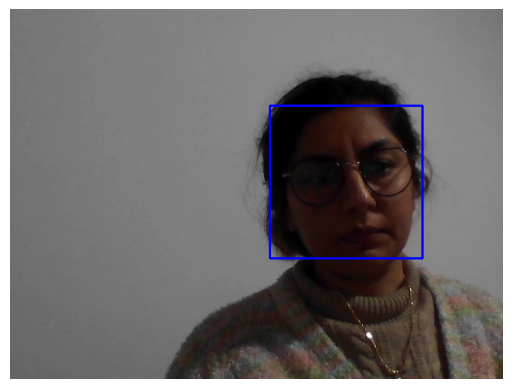

Detected 1 face(s)
Detected Skin Type: dry


In [ ]:
# Import necessary libraries
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import torch
import numpy as np
from PIL import Image
from transformers import AutoImageProcessor, AutoModelForImageClassification

# Function to capture photo using webcam in Google Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to convert captured image to OpenCV format (BGR)
def load_image(filename):
    img = Image.open(filename)
    img_np = np.array(img)
    return cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

# Load the skin type detection model and processor
processor = AutoImageProcessor.from_pretrained("dima806/skin_types_image_detection")
model = AutoModelForImageClassification.from_pretrained("dima806/skin_types_image_detection").to("cuda" if torch.cuda.is_available() else "cpu")

# Function to detect skin type using the image processor and model
def detect_skin_type(image):
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert OpenCV format to PIL
    inputs = processor(images=pil_image, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        outputs = model(**inputs)

    predicted_label_idx = outputs.logits.argmax(-1).item()

    # Map index to skin type label
    label_mapping = {0: "oily", 1: "normal", 2: "dry", 3: "sensitive"}
    predicted_label = label_mapping.get(predicted_label_idx, "unknown")

    return predicted_label

# Load OpenCV's pre-trained face detection model (Haar cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces and draw bounding boxes
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return faces, image  # Return the face coordinates and the image with boxes drawn

# Main code to capture image, detect faces, and detect skin type
try:
    # Capture an image from the webcam
    filename = take_photo()
    print(f"Image captured and saved to {filename}")

    # Load the captured image
    captured_image = load_image(filename)

    # Detect faces in the captured image
    faces, image_with_boxes = detect_faces(captured_image)

    # Show the image with face detection boxes
    from matplotlib import pyplot as plt

    # Convert BGR to RGB for displaying using matplotlib
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if len(faces) == 0:
        print("No faces detected")
    else:
        print(f"Detected {len(faces)} face(s)")

        # Detect skin type from the first detected face (cropping the face)
        x, y, w, h = faces[0]
        face_region = captured_image[y:y+h, x:x+w]
        skin_type = detect_skin_type(face_region)
        print(f"Detected Skin Type: {skin_type}")

except Exception as err:
    print(f"Error: {str(err)}")

**AMAZON BEAUTY PRODUCTS DATASET**

In [ ]:
!pip install datasets
from datasets import load_dataset

# Load datasets
dataset_reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
dataset_meta = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

meta_All_Beauty.jsonl:   0%|          | 0.00/213M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/112590 [00:00<?, ? examples/s]

In [ ]:
from google.colab import drive

**UNDERSTANDINFG OF DATASET**

In [ ]:
# Convert datasets to Pandas dataframes
# Access the 'full' split of the dataset_reviews before calling to_pandas()
reviews_df = dataset_reviews['full'].to_pandas()
metadata_df = dataset_meta.to_pandas()

In [ ]:
# Display the first few rows of each dataset
print("Reviews Dataset:")
print(reviews_df.head(5))



Reviews Dataset:
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ

In [ ]:
print("\nMetadata Dataset:")
print(metadata_df.head(5))


Metadata Dataset:
  main_category                                              title  \
0    All Beauty  Howard LC0008 Leather Conditioner, 8-Ounce (4-...   
1    All Beauty  Yes to Tomatoes Detoxifying Charcoal Cleanser ...   
2    All Beauty   Eye Patch Black Adult with Tie Band (6 Per Pack)   
3    All Beauty  Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...   
4    All Beauty  Precision Plunger Bars for Cartridge Grips – 9...   

   average_rating  rating_number  \
0             4.8             10   
1             4.5              3   
2             4.4             26   
3             3.1            102   
4             4.3              7   

                                            features  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [Material: 304 Stainless Steel; Brass tip, Len...   

      

**2. Preprocessing**

In [ ]:
!pip install tqdm

from tqdm.auto import tqdm



In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used.")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead.")

GPU is available and being used.


In [ ]:
# Combine relevant columns for embedding creation
reviews_df['combined'] = reviews_df['title'] + ". " + reviews_df['text']
metadata_df['combined'] = metadata_df['title'] + ". " + metadata_df['description']

**SentenceTransformers 🤗 is a Python framework for state-of-the-art sentence, text and image embeddings.**

In [ ]:
# Initialize the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Function to create embeddings in batches
def create_embeddings_in_batches(texts, model, batch_size=32):
    """
    Creates embeddings for a list of texts using the specified model in batches.

    Args:
        texts: A list of texts to embed.
        model: The SentenceTransformer model to use for embedding.
        batch_size: The size of each batch for processing.

    Returns:
        A PyTorch tensor containing the embeddings.
    """
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Creating Embeddings"):
        batch_texts = texts[i:i+batch_size]
        # Ensure each item in batch_texts is a string before encoding
        batch_texts = [str(text) for text in batch_texts]
        batch_embeddings = model.encode(batch_texts, convert_to_tensor=True)
        embeddings.append(batch_embeddings)
    return torch.cat(embeddings)

In [ ]:
# Example usage
model = SentenceTransformer('all-MiniLM-L6-v2')
texts = ["Such a lovely scent but not overpowering", "Works great but smells a little weird", "Synthetic feeling"]  # Replace with your list of texts
embeddings = create_embeddings(texts, model)

Creating Embeddings:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Create embeddings for reviews and metadata
reviews_embeddings = create_embeddings_in_batches(reviews_df['combined'].tolist(), model)
metadata_embeddings = create_embeddings_in_batches(metadata_df['combined'].tolist(), model)

print("Embeddings created successfully.")

Creating Embeddings:   0%|          | 0/21923 [00:00<?, ?it/s]

Creating Embeddings:   0%|          | 0/3519 [00:00<?, ?it/s]

Embeddings created successfully.


In [ ]:
# Create embeddings for reviews and metadata
reviews_embeddings = create_embeddings_in_batches(reviews_df['combined'].tolist(), model).to(device)  # Move to device
metadata_embeddings = create_embeddings_in_batches(metadata_df['combined'].tolist(), model).to(device) # Move to device

Creating Embeddings:   0%|          | 0/21923 [00:00<?, ?it/s]

Creating Embeddings:   0%|          | 0/3519 [00:00<?, ?it/s]

**3. Indexing**

Use a vector database to store the embeddings for quick retrieval. Here, we'll use faiss for indexing.



In [ ]:
!pip install faiss-gpu
from sentence_transformers import SentenceTransformer
import faiss


In [ ]:
# Step 3: Create and Configure GPU Index
res = faiss.StandardGpuResources()  # use a single GPU
flat_config = faiss.GpuIndexFlatConfig()
flat_config.useFloat16 = True  # Use float16 for memory efficiency
flat_config.device = 0         # Specify GPU ID

In [ ]:
# Create FAISS GPU Index
index_reviews = faiss.GpuIndexFlatL2(res, reviews_embeddings.shape[1], flat_config)
index_metadata = faiss.GpuIndexFlatL2(res, metadata_embeddings.shape[1], flat_config)

# Add Embeddings to GPU Index
index_reviews.add(reviews_embeddings.cpu().numpy())
index_metadata.add(metadata_embeddings.cpu().numpy())

print("FAISS GPU indices created and embeddings added successfully.")

FAISS GPU indices created and embeddings added successfully.


**4. Retrieval**

Retrieve relevant information based on user queries.

In [ ]:
def retrieve_documents(query, k=5):
    """
    Retrieves the top-k documents based on the provided query.

    Args:
        query (str): The query string to search for.
        k (int): The number of top documents to retrieve.

    Returns:
        tuple: A tuple containing the retrieved reviews and metadata.
    """
    try:
        # Encode the query and move it to the correct device
        query_embedding = model.encode(query, convert_to_tensor=True).to(device)

        # Reshape query_embedding to a 2D array if necessary
        query_embedding = query_embedding.reshape(1, -1)

        # Perform search on reviews
        D_reviews, I_reviews = index_reviews.search(query_embedding.cpu().numpy(), k)
        retrieved_reviews = [reviews_df.iloc[idx] for idx in I_reviews[0]]

        # Perform search on metadata
        D_metadata, I_metadata = index_metadata.search(query_embedding.cpu().numpy(), k)
        retrieved_metadata = [metadata_df.iloc[idx] for idx in I_metadata[0]]

        return retrieved_reviews, retrieved_metadata

    except Exception as e:
        print(f"An error occurred during document retrieval: {e}")
        return [], []

In [ ]:
# Example usage ---Extra
query = "recommend products for dry skin"
retrieved_reviews, retrieved_metadata = retrieve_documents(query)
print("Retrieved Reviews:", retrieved_reviews)
print("Retrieved Metadata:", retrieved_metadata)

Retrieved Reviews: [rating                                                             5.0
title                            I love this product for very dry skin
text                                           Great for personal use.
images                                                              []
asin                                                        B07DX5JJJ5
parent_asin                                                 B07DX5JJJ5
user_id                                   AFTEYOLGP2GBF3FJDSPMWOICDQKA
timestamp                                                1646976292452
helpful_vote                                                         1
verified_purchase                                                 True
combined             I love this product for very dry skin. Great f...
Name: 366151, dtype: object, rating                                                             5.0
title                  Awesome product for people with really dry skin
text                        

In [ ]:
# Example query
query = "What is the best product for dry skin?"
retrieved_reviews, retrieved_metadata = retrieve_documents(query)
print("Retrieved Reviews:", retrieved_reviews)
print("Retrieved Metadata:", retrieved_metadata)

Retrieved Reviews: [rating                                                             5.0
title                      If you have dry skin this is the very BEST!
text                 I have tried sooo many body lotions for dry sk...
images                                                              []
asin                                                        B001OFSH5A
parent_asin                                                 B001OFSH5A
user_id                                   AEZYOXSKPK6IOF2WWOGEZENMDIOA
timestamp                                                1668886501918
helpful_vote                                                         0
verified_purchase                                                 True
combined             If you have dry skin this is the very BEST!. I...
Name: 200646, dtype: object, rating                                                      5.0
title                                             miracle cream
text                                Excell

**5.Recommendation based on Ratings**

In [ ]:
#Extra
def generate_recommendations(skin_type):
    query = f"recommend products for {skin_type} skin"
    retrieved_reviews, retrieved_metadata = retrieve_documents(query, k=50)  # Retrieve more documents for better filtering

    # List to store products and their ratings
    product_ratings = []

    # Extract product titles and ratings from metadata
    for meta in retrieved_metadata:
        title = meta.get('title', 'Unknown Product')
        rating = meta.get('average_rating', 0)
        product_ratings.append((title, rating))

    # Sort products by ratings in descending order
    sorted_products = sorted(product_ratings, key=lambda x: x[1], reverse=True)

    # Get the top 5 products
    top_5_products = sorted_products[:5]

    # Print the top 5 recommended products
    print("Top 10 Recommended Products:")
    for product, rating in top_5_products:
        print(f"Product: {product}, Rating: {rating}")

# Example usage
skin_type = "dry"  # Replace with the detected skin type detect_skin_type(face_region)
generate_recommendations(skin_type)

Top 10 Recommended Products:
Product: Neolia Hydra-Screen Apricot Oil Soap for Dry Skin, 4.5 oz, Rating: 5.0
Product: The Body Shop Whip Body Lotion, Shea, 8.4 Fluid Ounce, Rating: 5.0
Product: Vaseline Intensive Care Aloe Soothe Lotion, 10 Ounces each (Pack of 6), Rating: 5.0
Product: Novartis Keri Advanced Moisture Therapy Extra Dry Skin Lotion, Enriched Formula, 15 Oz. by Novartis, Rating: 5.0
Product: Dr Eslee Hydra Emulsion 80ml/2.8fl.oz., Rating: 5.0


In [ ]:
# Example usage ---Extra
query = "recommend products for oily skin"
retrieved_reviews, retrieved_metadata = retrieve_documents(query)
print("Retrieved Reviews:", retrieved_reviews)
print("Retrieved Metadata:", retrieved_metadata)

Retrieved Reviews: [rating                                                             2.0
title                  This product is better for people with dry skin
text                    Not for oily skin. Made my skin look too shiny
images                                                              []
asin                                                        B06XFM2TVC
parent_asin                                                 B06XFM2TVC
user_id                                   AHA7YAE5TVORXJV5YIS6MF2WGDUQ
timestamp                                                1544618944085
helpful_vote                                                         0
verified_purchase                                                 True
combined             This product is better for people with dry ski...
Name: 598570, dtype: object, rating                                                    5.0
title                                           Good products
text                                Works grea

In [ ]:
#Extra
def generate_recommendations(skin_type):
    query = f"recommend products for {skin_type} skin"
    retrieved_reviews, retrieved_metadata = retrieve_documents(query, k=50)  # Retrieve more documents for better filtering

    # List to store products and their ratings
    product_ratings = []

    # Extract product titles and ratings from metadata
    for meta in retrieved_metadata:
        title = meta.get('title', 'Unknown Product')
        rating = meta.get('average_rating', 0)
        product_ratings.append((title, rating))

    # Sort products by ratings in descending order
    sorted_products = sorted(product_ratings, key=lambda x: x[1], reverse=True)

    # Get the top 5 products
    top_5_products = sorted_products[:5]

    # Print the top 10 recommended products
    print("Top 5 Recommended Products:")
    for product, rating in top_5_products:
        print(f"Product: {product}, Rating: {rating}")

# Example usage
skin_type = "oily"  # Replace with the detected skin type detect_skin_type(face_region)
generate_recommendations(skin_type)

Top 5 Recommended Products:
Product: The Body Shop Whip Body Lotion, Shea, 8.4 Fluid Ounce, Rating: 5.0
Product: Steuart's Deluxe Skin Care Lotion Deep Moisturizing Cream Amazing Product You Will Be Happy, Rating: 5.0
Product: Neolia Hydra-Screen Apricot Oil Soap for Dry Skin, 4.5 oz, Rating: 5.0
Product: Pure Organic Macadamia Oil, Rating: 5.0
Product: Africa's Best Ultimate Organics Olive Oil Body Whip Moisturing Cream, Rating: 5.0


**MULTIMODEL LLM -BLIP, CLIP AND STABLE DIFFUSER**

**STEP BY STEP**

In [ ]:
# Import necessary libraries
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import torch
import numpy as np
from PIL import Image
from transformers import AutoImageProcessor, AutoModelForImageClassification, BlipProcessor, BlipForConditionalGeneration
from transformers import CLIPProcessor, CLIPModel

# Function to capture photo using webcam in Google Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
# Function to detect skin type using the image processor and model
def detect_skin_type(image):
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert OpenCV format to PIL
    inputs = processor(images=pil_image, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        outputs = model(**inputs)

    predicted_label_idx = outputs.logits.argmax(-1).item()

    # Map index to skin type label
    label_mapping = {0: "oily", 1: "normal", 2: "dry", 3: "sensitive"}
    predicted_label = label_mapping.get(predicted_label_idx, "unknown")

    return predicted_label

In [ ]:
# Load the skin type detection model and processor
processor = AutoImageProcessor.from_pretrained("dima806/skin_types_image_detection")
model = AutoModelForImageClassification.from_pretrained("dima806/skin_types_image_detection").to("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Function to detect faces and draw bounding boxes
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return faces, image  # Return the face coordinates and the image with boxes drawn


In [ ]:
# Load BLIP model and processor for captioning
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")

# Function to generate caption using BLIP
def generate_caption(image):
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert OpenCV format to PIL
    inputs = blip_processor(pil_image, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    out = blip_model.generate(**inputs)
    caption = blip_processor.decode(out[0], skip_special_tokens=True)
    return caption

In [ ]:
# Load CLIP model and processor for image-text matching
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
!pip install diffusers transformers torch

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

 **Generate Images Based on Recommended Products**





In [ ]:
def generate_product_images(product_descriptions):
    images = []
    for description in product_descriptions:
        # Generate image
        image = pipe(description).images[0]
        images.append(image)
    return images

In [ ]:
# Existing product recommendation code (updated to include image generation)
def recommend_beauty_products(caption, skin_type):
    # Example beauty products (In real scenario, fetch from a database or API)
    beauty_products = {
        "oily": ["Oil-free moisturizer", "Clay mask", "Salicylic acid cleanser"],
        "normal": ["Hydrating serum", "Gentle cleanser", "SPF 30 sunscreen"],
        "dry": ["Moisturizing cream", "Hyaluronic acid serum", "Nourishing night cream"],
        "sensitive": ["Fragrance-free moisturizer", "Soothing toner", "Aloe vera gel"]
    }

    # Get the relevant products for the detected skin type
    products = beauty_products.get(skin_type, [])

    # Use CLIP to match the caption with the relevant products
    texts = clip_processor(text=products, return_tensors="pt", padding=True).to("cuda" if torch.cuda.is_available() else "cpu")
    image_input = clip_processor(images=[Image.fromarray(cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB))], return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    with torch.no_grad():
        image_features = clip_model.get_image_features(**image_input)
        text_features = clip_model.get_text_features(**texts)

    # Compute similarity scores
    similarity = torch.matmul(image_features, text_features.T)
    scores = similarity.squeeze().tolist()

    # Sort products by similarity scores
    sorted_products = [products[i] for i in np.argsort(scores)[::-1]]

    return sorted_products

<IPython.core.display.Javascript object>

Image captured and saved to photo.jpg


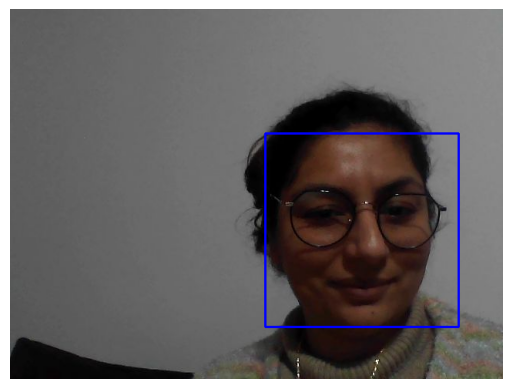

Detected 1 face(s)
Detected Skin Type: dry
Generated Caption: a woman with glasses and a blue background
Recommended Products: ['Moisturizing cream', 'Hyaluronic acid serum', 'Nourishing night cream']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

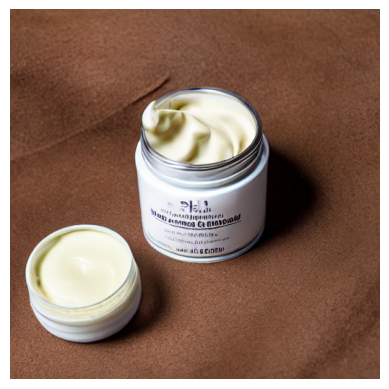

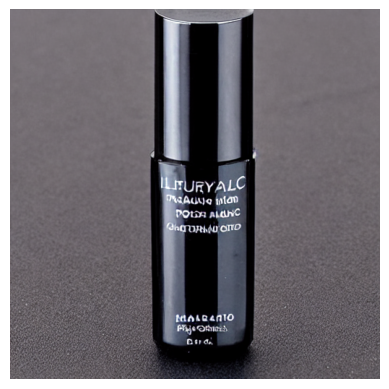

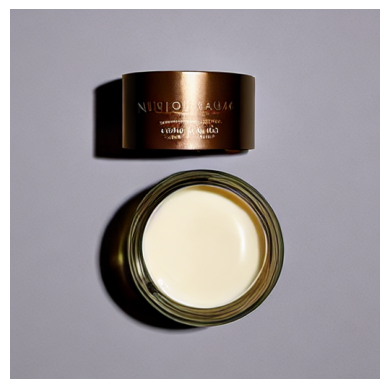

In [ ]:
# Main code to capture image, detect faces, detect skin type, generate caption, recommend products, and generate product images
try:
    # Capture an image from the webcam
    filename = take_photo()
    print(f"Image captured and saved to {filename}")

    # Load the captured image
    captured_image = load_image(filename)

    # Detect faces in the captured image
    faces, image_with_boxes = detect_faces(captured_image)

    # Show the image with face detection boxes
    from matplotlib import pyplot as plt

    # Convert BGR to RGB for displaying using matplotlib
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if len(faces) == 0:
        print("No faces detected")
    else:
        print(f"Detected {len(faces)} face(s)")

        # Detect skin type from the first detected face (cropping the face)
        x, y, w, h = faces[0]
        face_region = captured_image[y:y+h, x:x+w]
        skin_type = detect_skin_type(face_region)
        print(f"Detected Skin Type: {skin_type}")

        # Generate caption for the face region
        caption = generate_caption(face_region)
        print(f"Generated Caption: {caption}")

        # Recommend beauty products based on skin type and caption
        recommended_products = recommend_beauty_products(caption, skin_type)
        print(f"Recommended Products: {recommended_products}")

        # Generate images for the recommended products using Stable Diffusion
        product_images = generate_product_images(recommended_products)
        for image in product_images:
            plt.imshow(image)
            plt.axis('off')
            plt.show()

except Exception as err:
    print(f"Error: {str(err)}")